<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%20ML_%EB%B6%84%EB%A5%982__%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####분류모델####

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
iris.keys()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data_module

'sklearn.datasets.data'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
test_size=0.2, random_state=11)

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등.
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 하이퍼 파라미터 : 학습 프로세스가 시작되기 전에 설정되는 매개변수로서 의사결정 트리가 구축되는 방식에 영향을 주어 구조와 성능에 영향을 준다.
 - 최대 깊이(max_depth):
    - 설명: 트리의 최대 깊이. 이는 뿌리와 잎 사이의 최대 길이.
    - 영향: 트리가 깊어지면 더 복잡한 패턴을 포착할 수 있지만 과적합이 발생할 수 있다. 더 얕은 나무는 적합하지 않을 수 있다.
 - 최소 샘플 분할(min_samples_split):
    - 설명: 분할을 고려하기 위해 노드에 있어야 하는 최소 샘플 수를 정의.
    - 영향: 값이 높을수록 모델이 매우 특정한 패턴(과적합)을 학습하는 것을 방지하는 반면, 값이 낮을수록 데이터에서 노이즈가 포착될 수 있다.
 - 최소 샘플 리프(min_samples_leaf):
    - 설명: 분할 후 리프 노드에 있어야 하는 최소 샘플 수를 설정.
    - 영향: min_samples_split과 유사하게 과적합을 제어. 값이 높을수록 샘플이 거의 없는 리프 노드가 생성되지 않는다.
 - 최대 기능(max_features):
    - 설명: 노드 분할을 위해 고려되는 최대 기능 수.
    - 영향: 이 수를 줄이면 앙상블 모델에서 트리의 다양성이 증가할 수 있지만 중요한 기능이 제외될 수도 있다.
 - 기준(기준):
    - 설명 : 분할 품질을 측정하는 데 사용되는 기능. 일반적인 기준에는 지니 불순물에 대한 "gini", 분류 트리의 정보 이득에 대한 "엔트로피", 회귀 트리에 대한 "mse"(평균 제곱 오류)가 포함.
    - 영향: 기준 선택은 나무가 자라는 방식에 영향을 미치고 모델 성능에 영향을 미칠 수 있다.
 - 최대 리프 노드(max_leaf_nodes):
    - 설명: 트리의 최대 리프 노드 수.
    - 영향: 트리의 크기와 복잡성을 제어하는 ​​데 사용할 수 있다. 리프 노드가 많을수록 더 복잡한 모델이 가능.

* 장점:
 - 해석성: 전문가가 아니더라도 쉽게 이해하고 해석할 수 있습니다.
 - 데이터 정규화 필요 없음: 데이터 정규화가 필요하지 않습니다.
 - 비선형 관계 처리: 기능 간의 비선형 관계를 처리할 수 있습니다.
* 단점:
 - 과적합: 잡음이 있는 데이터를 과적합하는 경향이 있습니다.
 - 불안정성: 데이터의 작은 변화로 인해 완전히 다른 트리가 나타날 수 있습니다.
 - 편향된 트리: 지배적인 클래스에 편향되어 있습니다.

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/


지니계수 산출 사례
- 지니계수가 0인 경우 완전한 평등 : 소득 배열: [20, 20, 20, 20, 20]
- 지니계수가 1인 경우 한 명만 100의 소득을 가지고, 나머지는 모두 0의 소득 [0, 0, 0, 0, 100]

$G=1−∑
i=1
n
​
 (L
i
​
 +L
i−1
​
 )(P
i
​
 −P
i−1
​
 )=1−(0+0.2)⋅0.2=1−0.2⋅1=1−0=1$

$ 여기서
𝐿
𝑖
L
i
​
 는 누적 소득 비율,
𝑃
𝑖
P
i
​
 는 누적 인구 비율입니다.

인구 비율 (P): [0, 0.2, 0.4, 0.6, 0.8, 1.0]
소득 비율 (L): [0, 0, 0, 0, 0, 1]$

In [ ]:
# DecisionTreeClassifier 객체 생성
# Pruning(가지치기): 맨 마지막 leaf노드까지 바로 가는데 걸리는 조건의 개수인 깊이를 제한
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_slit=5, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# 성능 평가
# from sklearn.metrics import accuracy_score, classification_report
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'결정 트리 예측 정확도: {accuracy:.4f}', '\n')

결정 트리 예측 정확도: 0.9333 



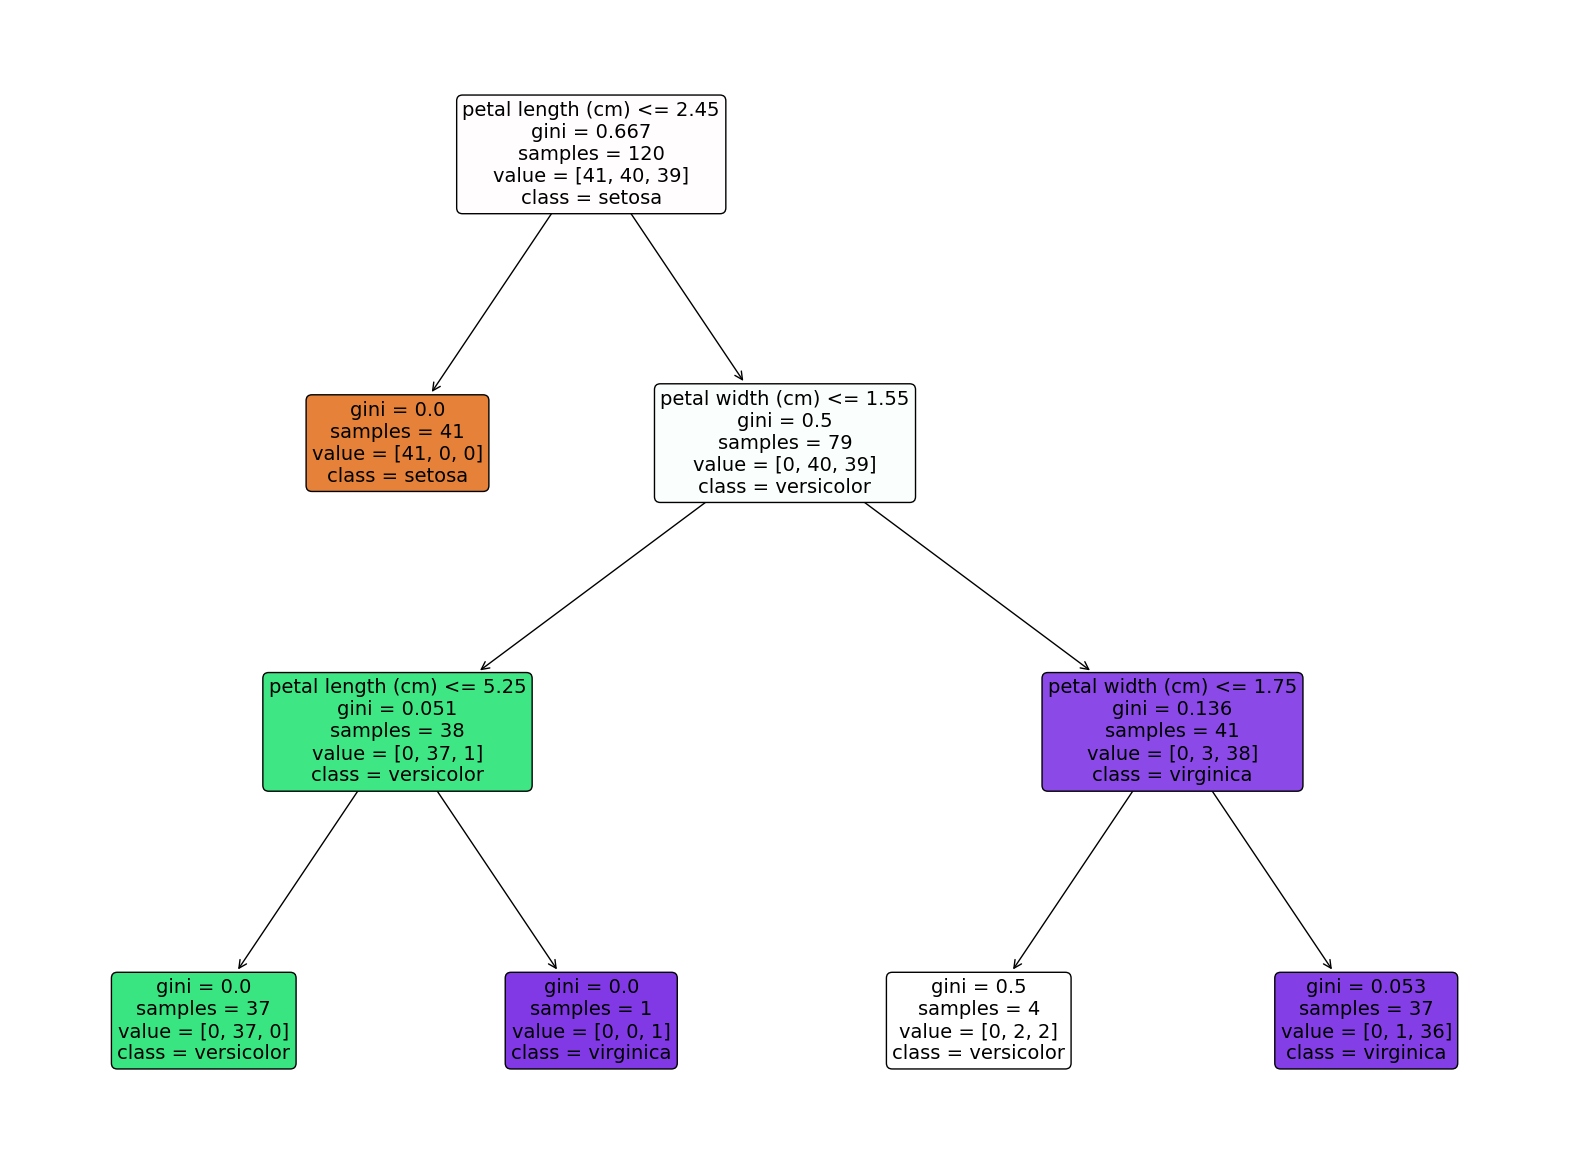

In [ ]:
# DT 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
tree.plot_tree(dt_clf, filled=True,
feature_names=iris_data.feature_names,
class_names=iris_data.target_names,
rounded=True, fontsize=14)

plt.show()
plt.close()

- 꽃잎 길이가 2.0, 꽃입 너비가 0.5인 꽃
- 꽃잎 길이가 3.0, 꽃입 너비가 1.2인 꽃
- 꽃잎 길이가 5.0, 꽃입 너비가 0.5인 꽃

Feature importances:
[0.    0.    0.558 0.442] 

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.558
petal width (cm): 0.442


<Axes: >

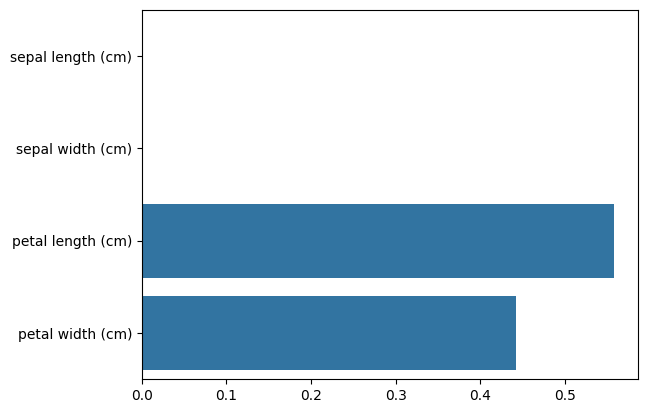

In [ ]:
import seaborn as sns
import numpy as np

# feature importance 추출
print(f'Feature importances:\n{np.round(dt_clf.feature_importances_, 3)}', '\n')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value:.3f}')

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [ ]:
# Confusion Matrix를 활용한 정확도 비교
# 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다. 하지만 학습데이터를 분류한 것이라는 사실을 염두해 두어야 한다.
# 만약 새로운 데이터가 들어오면 말했듯이 맨 마지막 가지치기의 의사결정나무가 일반화된 특징을 잡을 가능성이 높다.
# array[0.0] = 50;  실제 클래스 0이면서 예측된 클래스 0인 경우. (정확한 예측)
# array[1,2] = 1;  실제 클래스 1이면서 예측된 클래스 2인 경우. (잘못된 예측)
# array[2,1] = 4;  실제 클래스 2이면서 예측된 클래스 1인 경우. (잘못된 예측)
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_data.target, dt_clf.predict(iris_data.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

Q. load_breast_cancer 데이터 셋을 불러와서 다음을 수행하세요
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 다양한 하이퍼 파라미터 설정하여 결과 확인
- 결정트리를 시각화

정확도: 0.9474


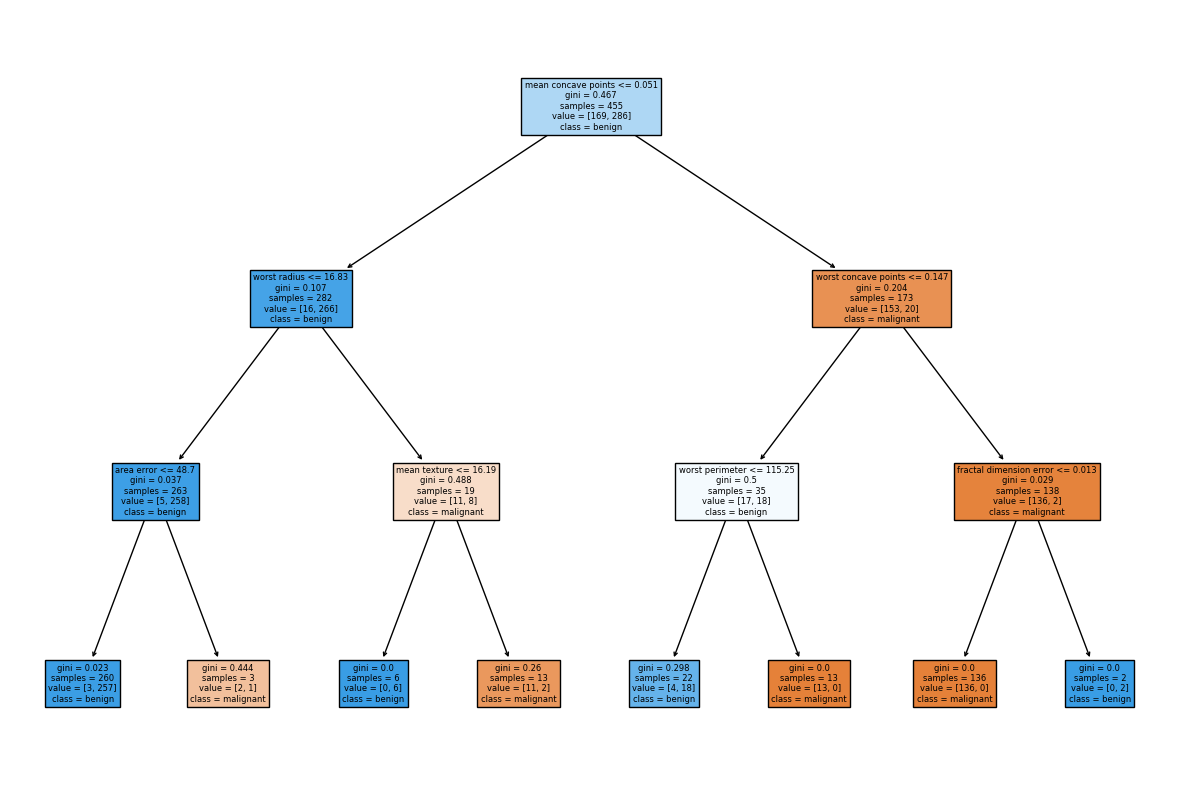

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# load_breast_cancer 데이터셋 로드
data = load_breast_cancer()
load_breast_cancer().keys()

# 특성과 라벨
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# 모델 학습
dt_clf.fit(X_train, y_train)

# 예측
y_pred = dt_clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.4f}")

# 결정 트리 시각화
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
cancer = load_breast_cancer()

# Stratify ensures that the train/test datasets maintain the same class ratio as the original dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,
                                                    stratify=cancer.target, random_state=150)

# Create and train the DecisionTreeClassifier
dt_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_tree.fit(X_train, y_train)

# Make predictions
pred = dt_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f'정확도: {round(accuracy, 2)}')

# Optional: Print confusion matrix for a detailed performance analysis
conf_matrix = confusion_matrix(y_test, pred)
print('Confusion Matrix:\n', conf_matrix)


정확도: 0.89
Confusion Matrix:
 [[41  1]
 [11 61]]


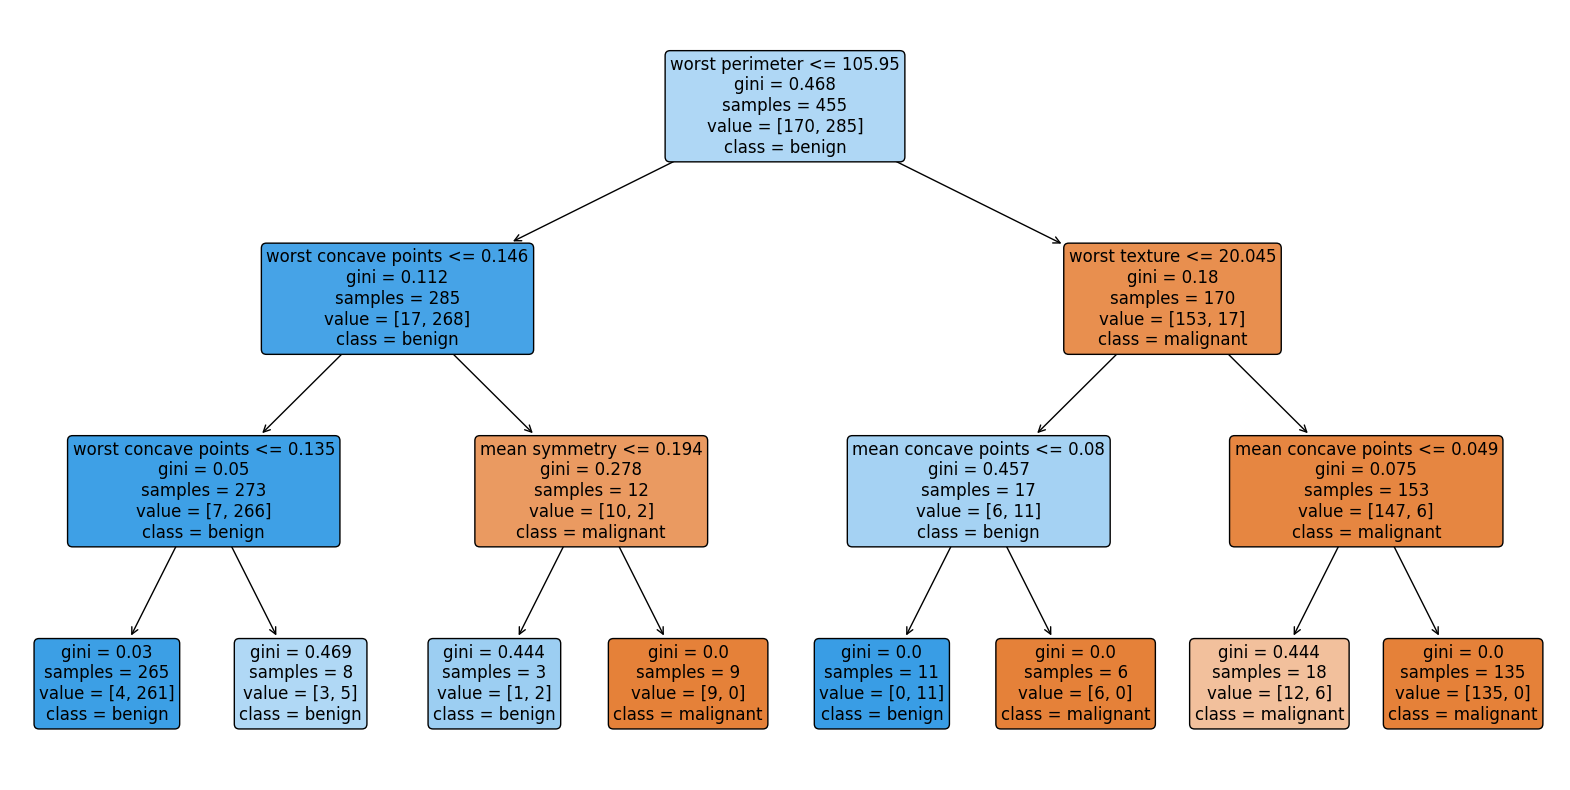

In [ ]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier(max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

### 서포트 벡터 머신(Support Vector Machines, SVM)

- 분류나 회귀, 이상치 탐지 등에 사용되는 강력한 머신러닝 알고리즘 중 하나입니다. SVM은 주로 분류 문제에 사용되며, 이 알고리즘의 핵심 아이디어는 데이터를 고차원 공간으로 변환하여 서로 다른 클래스 간의 최대 마진을 찾는 것입니다.

- SVM은 데이터를 두 개의 클래스로 나누는 결정 경계(결정 초평면이라고도 함)를 찾습니다. 이 결정 경계는 각 클래스의 가장 가까운 훈련 샘플(서포트 벡터라고 함)까지의 거리가 최대가 되는 선을 찾는 것을 목표로 합니다. 이를 '마진 최대화'라고 하며, 이 마진 최대화는 오류를 최소화하고 모델의 일반화 성능을 향상시키는 데 중요한 역할을 합니다.

- SVM은 선형 뿐만 아니라 비선형 분류 문제에도 사용할 수 있습니다. 비선형 문제를 해결하기 위해, SVM은 커널 트릭이라는 기법을 사용하여 데이터를 고차원 공간으로 변환하고, 그 고차원에서 선형 결정 경계를 찾습니다. 이 커널 트릭 덕분에 SVM은 복잡한 분류 문제를 처리할 수 있습니다.

- SVM은 작은 데이터셋에서도 잘 작동하며, 높은 차원의 데이터에 대해 강력한 성능을 발휘합니다. 그러나 데이터셋이 크거나 노이즈가 많은 경우, 그리고 데이터가 선형적으로 구분되지 않는 경우에는 다른 알고리즘(예: 랜덤 포레스트나 신경망)에 비해 성능이 떨어질 수 있습니다.

https://wooono.tistory.com/111

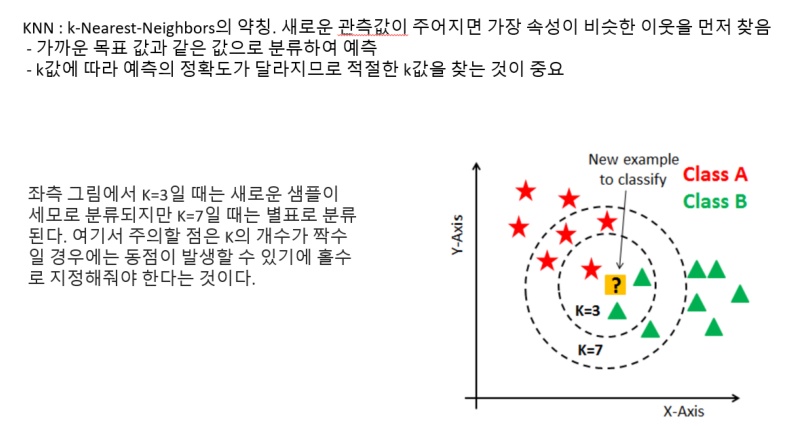

In [ ]:
import matplotlib.pyplot as plt

# 이미지 불러오기
img = plt.imread('/content/KakaoTalk_20240724_123408566.png')
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

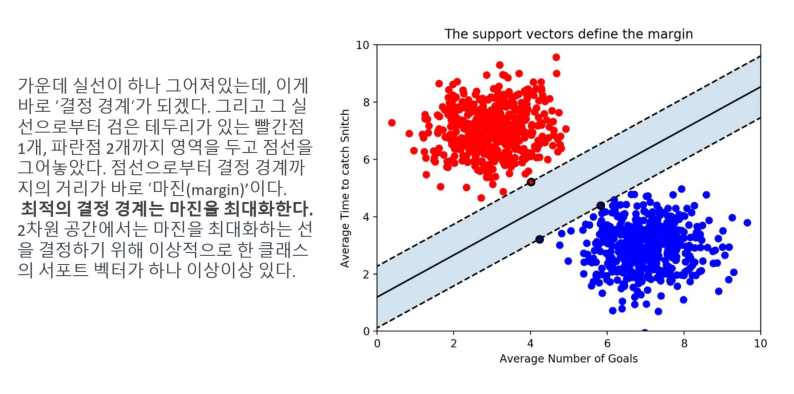

In [ ]:
import matplotlib.pyplot as plt

# 이미지 불러오기
img = plt.imread('/content/KakaoTalk_20240724_141026827.jpg')
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

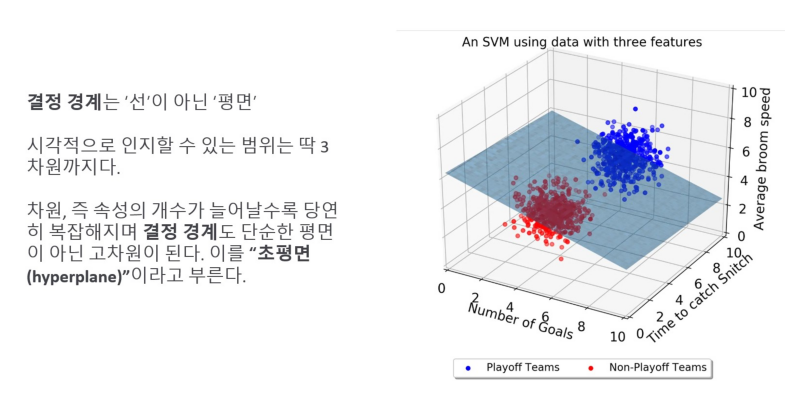

In [ ]:
import matplotlib.pyplot as plt

# 이미지 불러오기
img = plt.imread('/content/KakaoTalk_20240724_141326911.jpg')
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

kernel
- SVM은 데이터를 분류하기 위해 결정 경계(Decision Boundary)라고 하는 분류선을 그리는데 이 때, kernel 매개변수는 이 결정 경계가 어떤 형태를 가질지 결정한다. kernel='linear'는 선형 결정 경계를 사용한다는 의미. 즉, 데이터가 선형적으로 분리될 수 있다고 가정하고, 그에 따른 최적의 직선을 찾는다. 이는 특징들이 선형 관계에 있다고 가정할 때 효과적. 다른 커널 유형으로는 poly(다항식), rbf(방사 기저 함수), sigmoid 등이 있으며, 이들은 비선형적 데이터를 처리하는 데 유용.

C=1.0
- C 매개변수는 SVM 분류기의 정규화 매개변수. 이 값은 모델이 각각의 데이터 포인트들을 얼마나 정확하게 분류할 것인지를 결정.
- C 값이 높으면 모델은 훈련 데이터에 대해 더 정확하게 분류하려고 하며 이는 결정 경계가 개별 데이터 포인트에 더 밀접하게 맞추어져 있는 상태를 의미. 하지만 이는 과적합(Overfitting)의 위험을 증가시킬 수 있다.
- 반대로 C 값이 낮으면 모델은 이러한 개별 데이터 포인트들에 덜 민감하게 된다. 즉, 결정 경계가 더 많은 데이터 포인트를 잘못 분류할 수 있지만, 일반적으로 더 일반화된(Generalized) 모델을 만들 수 있다.
- C=1.0은 기본값으로, 상대적으로 균형 잡힌 정규화 수준을 제공. 이 값은 문제에 따라 조정될 수 있으며, 특정 데이터셋에 대한 모델의 성능을 최적화하는 데 사용.

Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드 및 분할
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Kernel SVC
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



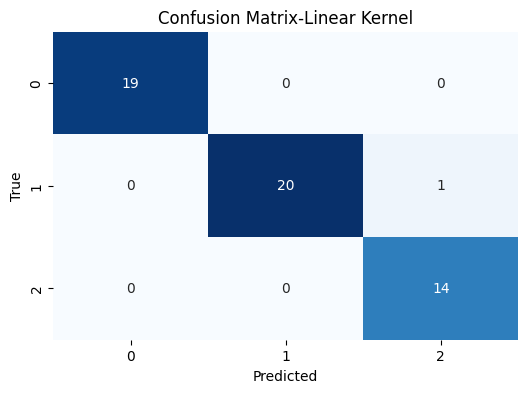

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
svc = SVC(kernel='linear', random_state=42)
linear_svc = svc.fit(X_train, y_train)

# 예측
y_pred_linear = linear_svc.predict(X_test)

# 성능평가
print("Linear Kernel SVC")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix-Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Polynomial Kernel SVC
[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



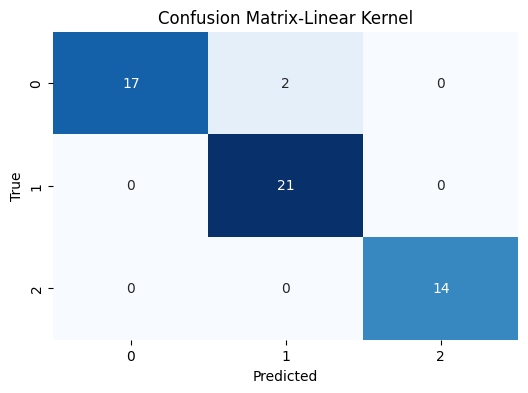

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
svc = SVC(kernel='poly', random_state=42)
poly_svc = svc.fit(X_train, y_train)

# 예측
y_pred_linear = linear_svc.predict(X_test)

# 성능평가
print("Polynomial Kernel SVC")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Polynomial Matrix-Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

RBF Kernel SVC
[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



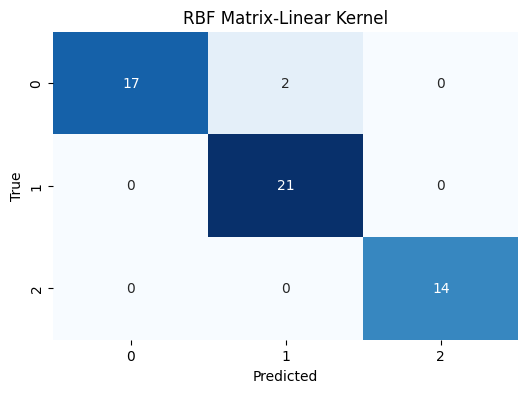

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
svc = SVC(kernel='rbf', random_state=42)
rbf_svc = svc.fit(X_train, y_train)

# 예측
y_pred_linear = linear_svc.predict(X_test)

# 성능평가
print("RBF Kernel SVC")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('RBF Matrix-Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

실제 평가 결과를 통해 각 커널의 성능을 비교해 보면 다음과 같은 결론을 얻을 수 있습니다:

- Linear Kernel: 데이터가 선형적으로 분리될 수 있는 경우 적합합니다. Wine 데이터셋에서 높은 정확도를 보입니다.
- Polynomial Kernel: 데이터가 다항식 경계를 가질 때 적합합니다. Wine 데이터셋에서는 선형 커널에 비해 다소 낮은 정확도를 보일 수 있습니다.
- RBF Kernel: 데이터가 비선형 경계를 가질 때 적합합니다. Wine 데이터셋에서 매우 높은 정확도를 보입니다.

Wine 데이터셋에서는 Linear Kernel이 가장 적합할 수 있습니다. 이는 데이터가 선형적으로 잘 분리될 수 있기 때문입니다. 그러나 실제로는 각 커널의 성능을 교차 검증을 통해 비교하고, 데이터의 특성에 따라 최적의 커널을 선택합니다.

SVC 커널

- 선형 커널 (Linear Kernel): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 (Polynomial Kernel): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 (RBF Kernel): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

####  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression(max_iter=10000, solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=9)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vc_clf = VotingClassifier( estimators=[('LR', lr_clf), ("KNN",knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습 / 예측 / 평가
vc_clf.fit(X_train, y_train)
pred = vc_clf.predict(X_test)
print("Votinf 분류기 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습 / 예측 / 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Votinf 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9649


#### Random Forest
여러 개의 의사결정 트리(Decision Trees)를 조합하여 작동하는 앙상블 학습 방법의 하나로 다수의 의사결정 트리를 생성하고, 각각의 트리가 데이터에 대한 예측을 수행한 후, 이 예측들을 결합하여 최종 예측 결과를 도출

베깅(Bagging), 또는 부트스트랩 어그리게이팅(Bootstrap Aggregating)은 앙상블 학습 방법 중 하나로, 모델의 분산을 줄이고 오버피팅을 방지하기 위해 사용.

베깅의 핵심 아이디어와 방식

- 부트스트랩 샘플링:
베깅은 원본 훈련 데이터 세트에서 복원 추출 방식(하나의 데이터 포인트를 여러 번 샘플링할 수 있음)을 사용하여 여러 개의 서브셋(부트스트랩 샘플)을 생성. 각 부트스트랩 샘플은 원본 데이터 세트와 크기는 같지만, 일부 데이터는 중복되고 일부 데이터는 누락될 수 있다.
- 독립적인 모델 훈련:
생성된 각 서브셋은 독립적인 모델(예: 의사결정 트리)을 훈련시키는 데 사용. 이렇게 함으로써, 각 모델은 데이터의 다른 측면을 학습하게 된다.
- 결과의 결합:
훈련된 모든 모델의 예측 결과는 결합되어 최종 결과를 생성.
분류 문제의 경우, 일반적으로 다수결(voting) 방식이 사용되며, 회귀 문제의 경우에는 평균이 사용.

베깅의 장점
- 분산 감소: 여러 모델의 예측을 결합함으로써 개별 모델이 가질 수 있는 높은 분산을 줄일 수 있다.
- 오버피팅 방지: 부트스트랩 샘플링으로 인해 각 모델이 훈련 데이터의 다른 측면을 학습하므로, 오버피팅을 방지하는 데 도움이 된다.
- 병렬 처리 가능: 각 모델은 독립적으로 훈련되므로, 병렬 처리가 가능해져 계산 효율성이 높다.

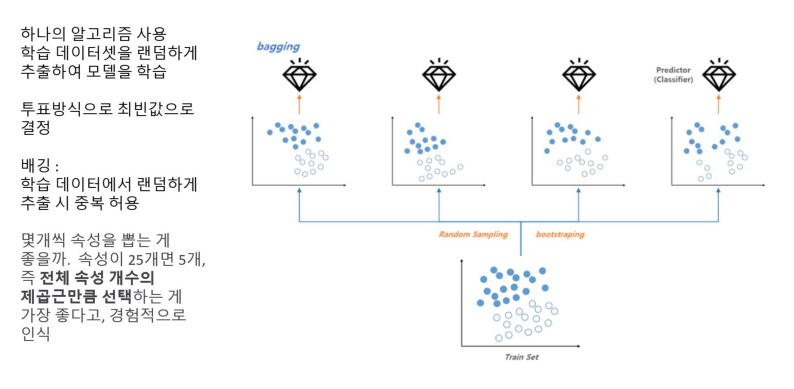

In [ ]:
import matplotlib.pyplot as plt

# 이미지 불러오기
img = plt.imread('/content/KakaoTalk_20240724_154051764.jpg')
plt.figure(figsize=(10,6))

# 이미지 표시
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

주요 하이퍼파라미터

n_estimators:
- 설명: 랜덤포레스트에 포함될 결정 트리의 개수를 지정합니다.
- 기본값: 100
- 영향: 트리의 개수가 많을수록 모델의 안정성과 성능이 향상될 수 있지만, 연산 비용도 증가합니다.

max_depth:
- 설명: 각 트리의 최대 깊이를 설정합니다.
- 기본값: None (리프 노드가 순수해질 때까지 또는 min_samples_split보다 적은 샘플을 가질 때까지 계속 분할)
- 영향: 깊이가 깊을수록 모델이 복잡해지고 과적합할 가능성이 커집니다.

min_samples_split:
- 설명: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
- 기본값: 2
- 영향: 큰 값은 과적합을 방지하는 데 도움이 됩니다.

min_samples_leaf:
- 설명: 리프 노드에 있어야 하는 최소 샘플 수입니다.
- 기본값: 1
- 영향: 큰 값은 과적합을 방지하고, 트리의 일반화 능력을 향상시킬 수 있습니다.

max_features:
- 설명: 각 분할에서 고려할 최대 특성 수입니다.
- 옵션: auto, sqrt, log2, 또는 정수 값
- 기본값: auto (모든 특성을 사용)
- 영향: 특성 수가 적을수록 모델의 다양성이 증가하지만, 너무 적으면 성능이 떨어질 수 있습니다.

Task2_0724. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()

# Split the dataset into features and target variable
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],  # Note: 'auto' is deprecated
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Best Hyperparameters: {best_params}")

Accuracy: 1.0000
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the dataset into features and target variable
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform random search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy, best_params

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the dataset into features and target variable
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy, best_params


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


(0.9736842105263158,
 {'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 50})

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


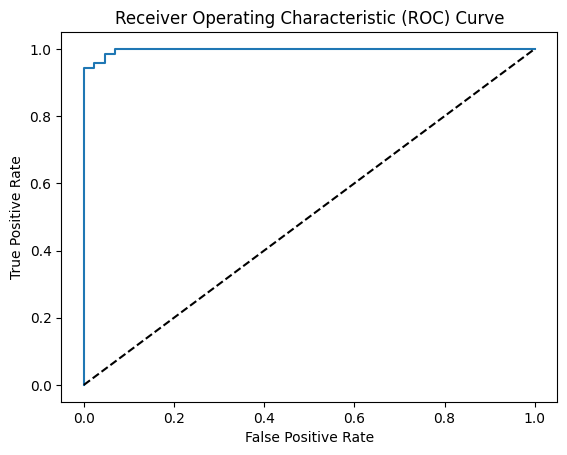

ROC AUC: 0.9974


In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the dataset into features and target variable
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy, roc_auc
# Calculate the predicted probabilities
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Plot the ROC curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


최적의 하이퍼 파라미터: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


오차 행렬:
[[ 59   4]
 [  1 107]]
정확도:
 0.9708
정밀도:
 0.9640
재현율: 0.9907
F1:
 0.9772
AUC: 0.9971



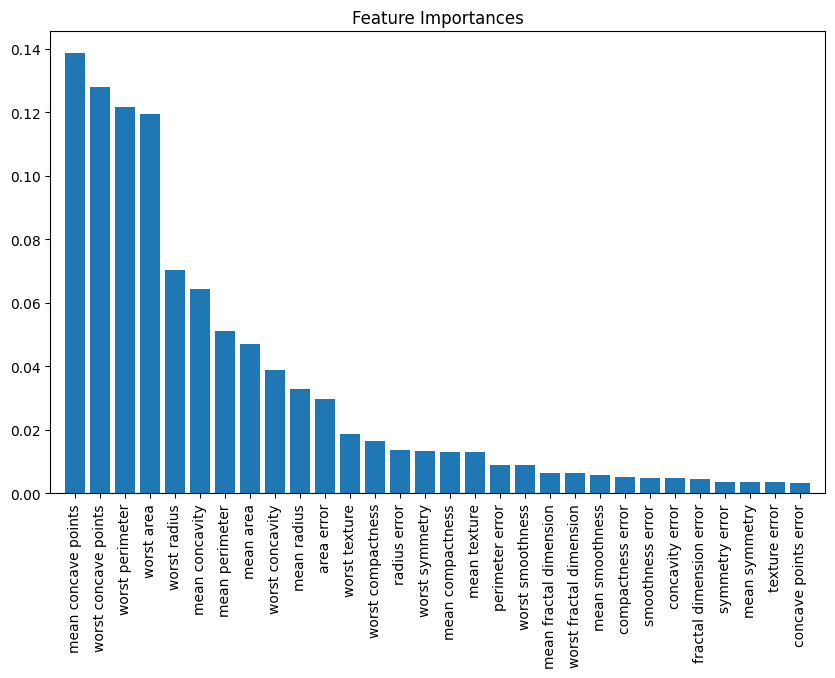

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 사용자 정의 함수
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'오차 행렬:\n{conf_matrix}')
    print(f'정확도:\n {accuracy:.4f}')
    print(f'정밀도:\n {precision:.4f}')
    print(f'재현율: {recall:.4f}')
    print(f'F1:\n {f1:.4f}')
    print(f'AUC: {roc_auc:.4f}')
    print('')

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 하이처 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 모델 생성
rf = RandomForestClassifier(random_state=42)

# GridSearchCv 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
best_params = grid_search.best_params_
print(f'최적의 하이퍼 파라미터: {best_params}')

# 최적의 모델로 평가
best_rf = grid_search.best_estimator_
train_and_evaluate(best_rf, X_train, X_test, y_train, y_test)

# 중요 변수 시각화
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

n_estimators: 10
Accuracy: 0.96
Confusion Matrix:
[[ 60   3]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



n_estimators: 50
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



n_estimators: 100
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

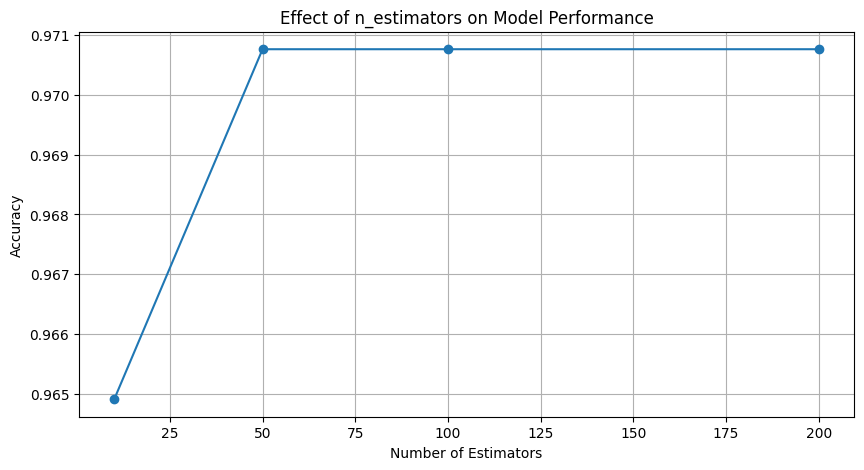

max_depth: 5
Accuracy: 0.96
Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



max_depth: 10
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_depth: 20
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

         

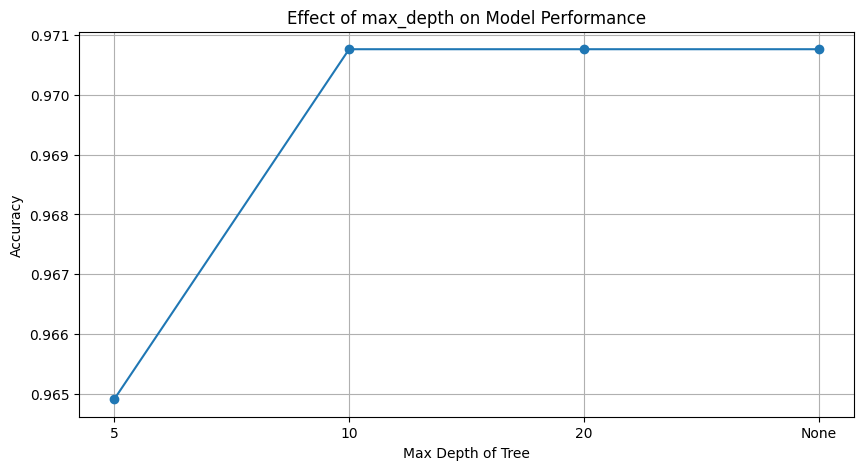

max_features: sqrt
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_features: log2
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171





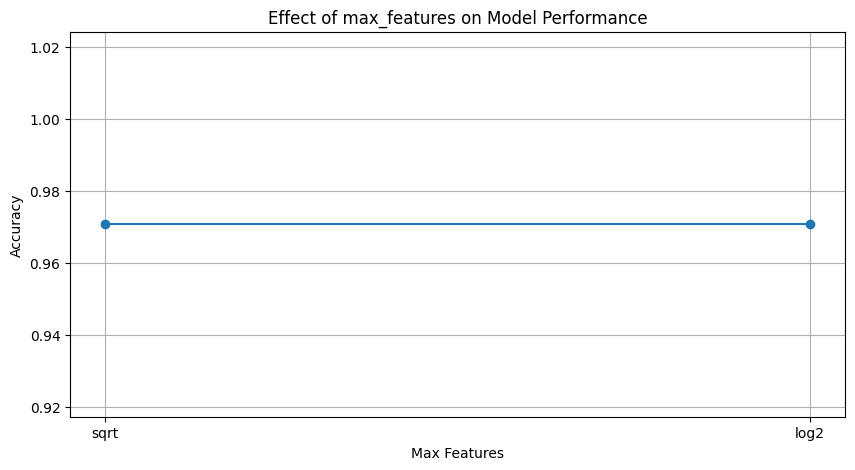

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# 1. n_estimators (트리의 개수)
n_estimators_range = [10, 50, 100, 200]
n_estimators_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    n_estimators_scores.append(score)
    print(f'n_estimators: {n}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# n_estimators 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, n_estimators_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Model Performance')
plt.grid(True)
plt.show()

# 2. max_depth (트리의 최대 깊이)
max_depth_range = [5, 10, 20, None]
max_depth_scores = []

for depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_depth_scores.append(score)
    print(f'max_depth: {depth}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_depth 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot([str(d) for d in max_depth_range], max_depth_scores, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Performance')
plt.grid(True)
plt.show()

# 3. max_features (각 분할에서 고려할 최대 특성 수)
max_features_range = ['sqrt', 'log2']
max_features_scores = []

for feature in max_features_range:
    rf = RandomForestClassifier(max_features=feature, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_features_scores.append(score)
    print(f'max_features: {feature}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_features 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(max_features_range, max_features_scores, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Effect of max_features on Model Performance')
plt.grid(True)
plt.show()


### 로지스틱 회귀(Logistic Regression)

- 분류 문제를 해결하기 위한 알고리즘으로, 선형 회귀와 마찬가지로 입력 특성의 가중치 합을 계산하는데, 선형 회귀와 달리 결과를 이진 분류(0 또는 1, 참 또는 거짓 등)에 사용할 수 있는 확률로 변환.

- 로지스틱 회귀는 선형 회귀와 비슷하게 모델의 예측과 실제 값 사이의 차이를 최소화하도록 가중치를 학습. 하지만 로지스틱 회귀는 선형 회귀와는 달리 결과를 0과 1 사이의 값으로 제한하는 로지스틱 함수(또는 시그모이드 함수)를 사용.

- 로지스틱 회귀는 각 클래스에 속할 확률을 제공하며, 특정 임계값(일반적으로 0.5)을 초과하는 경우 데이터 포인트를 해당 클래스에 할당. 이는 이진 분류뿐만 아니라 다중 클래스 분류에도 적용될 수 있다(이 경우에는 일대다(OvR) 또는 다항 로지스틱 회귀를 사용할 수 있다).
  - 일대다(OvR): 각 클래스에 대해 개별 이진 분류기를 학습시키고, 가장 높은 확률을 제공하는 분류기의 클래스로 분류합니다.
  - 다항 로지스틱 회귀: 소프트맥스 함수를 사용하여 각 클래스에 대한 확률을 계산하고, 가장 높은 확률을 가지는 클래스로 분류합니다.
- 로지스틱 회귀는 출력이 확률이기 때문에, 결과의 해석이 직관적이며 모델의 예측이 불확실한 경우에도 그 정도를 측정할 수 있다. 또한 로지스틱 회귀는 선형 회귀보다 이상치에 덜 민감하며, 모델이 과적합되는 것을 방지하기 위해 규제를 적용할 수 있다는 장점도 있다.

- 로지스틱 함수, 또는 시그모이드 함수는 S-자 형태를 띠는 함수로, 실수 입력값을 0과 1 사이의 출력값으로 변환하는 데 사용. 이 함수는 머신러닝, 특히 이진 분류 문제에서 중요한 역할을 한다.

- 로지스틱 함수의 정의

    - f(x) = 1 / (1 + e^-x)

    - e는 자연 상수(약 2.71828). x는 어떤 실수 값도 가능하며, -무한대에서 무한대까지의 범위를 가지며 이 함수는 모든 실수 입력에 대해 0과 1 사이의 값을 반환.

    - 함수가 결과를 0과 1 사이로 제한하기 때문에, 이는 확률에 대해 논의할 때 특히 유용. 로지스틱 회귀 분석에서 이 함수는 선형 함수의 결과를 확률로 변환하는데 사용.

    - 입력값 x가 커질수록 로지스틱 함수의 출력은 1에 가까워지고, x가 작아질수록 출력은 0에 가까워진다. x가 0일 때 로지스틱 함수의 값은 0.5입니다. 이러한 특성 때문에 로지스틱 함수는 이진 분류 문제에 널리 사용.

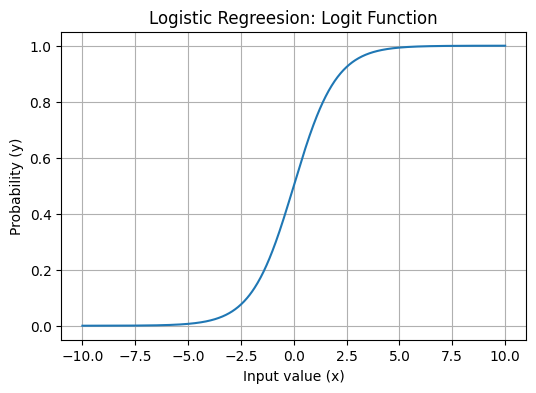

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 로지스틱 함수 정의
def logit_function(x):
    return 1 / (1 + np.exp(-x))

# 입력값 범위
x = np.linspace(-10, 10, 1000)

# 로지스틱 함수 적용
y = logit_function(x)

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title('Logistic Regreesion: Logit Function')
plt.xlabel('Input value (x)')
plt.ylabel('Probability (y)')
plt.grid(True)
plt.show()

In [30]:
# 로지스틱 회귀
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 표준편차 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))

accuracy: 0.977


- max_iter=100:
로지스틱 회귀 모델이 데이터에 대해 수렴하지 않을 때, 반복 횟수를 늘려서 해결할 수 있습니다. 기본값은 100이지만, 필요한 경우 이 값을 늘릴 수 있습니다. 최적화 과정은 모델의 가중치를 업데이트하여 비용 함수를 점진적으로 최소화하는 과정입니다.
  - 초기화: 모델 파라미터(가중치와 절편)를 임의의 값으로 초기화합니다.
  - 예측: 현재 파라미터 값을 사용하여 훈련 데이터에 대한 예측을 수행합니다.
  - 오차 계산: 예측값과 실제값 사이의 오차를 계산합니다.
  - 비용 함수 계산: 현재 파라미터 값에 대한 비용 함수의 값을 계산합니다.
  - 기울기 계산: 비용 함수를 최소화하기 위해 필요한 기울기(그래디언트)를 계산합니다.
  - 파라미터 업데이트: 기울기를 사용하여 파라미터를 업데이트합니다.

- solver='lbfgs':
'lbfgs(Limited-memory Broyden-Fletcher-Goldfarb-Shanno)'는 대부분의 경우에 빠르고 안정적으로 수렴하는 알고리즘입니다. 특히, 큰 데이터셋과 많은 특성을 처리할 때 유용합니다. L-BFGS는 'Limited-memory'로, 메모리 사용을 최소화합니다. 이는 특히 고차원의 문제에서 중요합니다. 메모리 사용을 줄이기 위해 이전 단계의 기울기와 위치 정보만을 사용합니다.

- random_state=42:
모델의 학습 결과를 재현 가능하게 하기 위해 설정합니다. 이는 실험을 반복하고 결과를 비교할 때 유용합니다.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))

accuracy: 0.977


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# Define the logistic regression model
lr_clf = LogisticRegression(solver='liblinear')

# Define the parameter grid
param_grid = {'penalty': ['l2', 'l1'],
              'C': [0.01, 0.1, 1, 5, 10]}

# Set up GridSearchCV
grid_clf = GridSearchCV(lr_clf, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model
grid_clf.fit(data_scaled, cancer.target)

# Print the best parameters and the best score
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))


최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.979


In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the logistic regression model
lr_clf = LogisticRegression(solver='liblinear')

# Define the parameter grid
param_grid = {'penalty': ['l2', 'l1'],
              'C': [0.01, 0.1, 1, 5, 10]}

# Set up GridSearchCV
grid_clf = GridSearchCV(lr_clf, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model
grid_clf.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

# Predict on the test set
best_grid = grid_clf.best_estimator_
pred1 = best_grid.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred1)
print('로지스틱 예측 정확도: {0:.4f}'.format(accuracy))

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도: 0.977
로지스틱 예측 정확도: 0.9942


Task1_0725. 타이타닉 생존자 예측 데이터 세트 train.csv에 대하여 다음 사항을 수행하세요.
- 일괄 전처리 사용자 함수 transform_features(df) 작성
- 분류 모델 학습 및 평가 사용자 함수 작성
- dt, lr, rf 모델링 및 평가(정확도)

- GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
  - Decision Tree, Random Forest, Logistic Regression 모델별 수행
  - 선택한 모델에 적합한 parameter greed 적용
  - cv=5 적용

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

# 데이터셋 불러오기
file_path = '/content/train.csv'
df = pd.read_csv(file_path)

# 데이터 전처리 함수 정의
def transform_features(df):
    # 결측값 처리
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df.drop(columns=['Cabin'], inplace=True)

    # 범주형 변수 인코딩
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

    # 새로운 특성 생성
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

    return df

# 전처리 수행
df_transformed = transform_features(df.copy())

# 모델 학습 및 평가 함수 정의
def train_and_evaluate_model(model, X, y, param_grid=None):
    if param_grid:
        # 그리드 서치로 하이퍼파라미터 튜닝
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
    else:
        # 그리드 서치 없이 기본 모델로 학습 및 평가
        best_model = model
        best_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
        best_params = None
        best_model.fit(X, y)

    return best_model, best_score, best_params

# 특성(X)와 타겟(y) 정의
X = df_transformed.drop(columns='Survived')
y = df_transformed['Survived']

# 모델 및 하이퍼파라미터 그리드 정의
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    }
}

# 결과 저장을 위한 딕셔너리 초기화
results = {}

# 각 모델에 대해 학습 및 평가 수행
for model_name, model_info in models.items():
    model, score, params = train_and_evaluate_model(model_info['model'], X, y, model_info['param_grid'])
    results[model_name] = {
        'Best Model': model,
        'Best Score': score,
        'Best Params': params
    }

# 결과 출력
results_df = pd.DataFrame(results).T
results_df



,Best Model,Best Score,Best Params
DecisionTree,"DecisionTreeClassifier(max_depth=7, min_sample...",0.826056,"{'max_depth': 7, 'min_samples_split': 10}"
RandomForest,"(DecisionTreeClassifier(max_depth=7, max_featu...",0.829421,"{'max_depth': 7, 'min_samples_split': 10, 'n_e..."
LogisticRegression,"LogisticRegression(C=0.1, max_iter=1000, solve...",0.797973,"{'C': 0.1, 'solver': 'liblinear'}"


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Titanic 데이터셋 불러오기
df = pd.read_csv('/content/train.csv')

# 데이터 전처리 함수 정의
def transform_features(df):
    # 불필요한 열 제거
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    # 결측값 채우기
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)

    # 범주형 변수 수치형으로 변환
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # 새로운 특징 생성: 가족 크기
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # 새로운 특징 생성: 나이에 따른 그룹화
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=[0, 1, 2, 3, 4])

    # 새로운 특징 생성: 요금에 따른 그룹화
    df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])

    return df

# 데이터 전처리 함수 적용
df = transform_features(df)

# 특징 변수(X)와 타겟 변수(y) 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습용 데이터셋과 테스트용 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 평가 함수 정의
def classify_and_evaluate(model, X_train, X_test, y_train, y_test):
    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 수행
    y_pred = model.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# GridSearchCV를 위한 파라미터 그리드 정의
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11, 13], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# 모델 정의
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)

# 각 모델에 대해 GridSearchCV 수행
grid_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5)
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5)
grid_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=5)

# 모델 학습
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

# 최적의 모델 획득
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_
best_lr = grid_lr.best_estimator_

# 모델 평가
accuracy_dt = classify_and_evaluate(best_dt, X_train, X_test, y_train, y_test)
accuracy_rf = classify_and_evaluate(best_rf, X_train, X_test, y_train, y_test)
accuracy_lr = classify_and_evaluate(best_lr, X_train, X_test, y_train, y_test)

# 정확도 출력
print('Decision Tree Accuracy:', accuracy_dt)
print('Random Forest Accuracy:', accuracy_rf)
print('Logistic Regression Accuracy:', accuracy_lr)

Decision Tree Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8100558659217877
Logistic Regression Accuracy: 0.7821229050279329


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Titanic 데이터셋 불러오기
df = pd.read_csv('/content/train.csv')

# 데이터 전처리 함수 정의
def transform_features(df):
    # 불필요한 열 제거
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    # 결측값 채우기
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)

    # 범주형 변수 수치형으로 변환
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # 새로운 특징 생성: 가족 크기
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # 새로운 특징 생성: 나이에 따른 그룹화
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=[0, 1, 2, 3, 4])

    # 새로운 특징 생성: 요금에 따른 그룹화
    df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])

    return df

# 데이터 전처리 함수 적용
df = transform_features(df)

# 특징 변수(X)와 타겟 변수(y) 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습용 데이터셋과 테스트용 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 평가 함수 정의
def classify_and_evaluate(model, X_train, X_test, y_train, y_test):
    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 수행
    y_pred = model.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# GridSearchCV를 위한 파라미터 그리드 정의
param_grid_dt = {'max_depth': [3, 5, 7, 9, 11, 13], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 4, 5]}

# 모델 정의
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
gb = GradientBoostingClassifier(random_state=42)

# 각 모델에 대해 GridSearchCV 수행
grid_dt = GridSearchCV(dt, param_grid=param_grid_dt, cv=5)
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5)
grid_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=5)
grid_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=5)

# 모델 학습
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# 최적의 모델 획득
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_
best_lr = grid_lr.best_estimator_
best_gb = grid_gb.best_estimator_

# 앙상블 모델 정의
voting_clf = VotingClassifier(estimators=[('dt', best_dt), ('rf', best_rf), ('lr', best_lr), ('gb', best_gb)], voting='hard')

# 모델 학습 및 평가
accuracy_voting = classify_and_evaluate(voting_clf, X_train, X_test, y_train, y_test)

# 개별 모델 평가
accuracy_dt = classify_and_evaluate(best_dt, X_train, X_test, y_train, y_test)
accuracy_rf = classify_and_evaluate(best_rf, X_train, X_test, y_train, y_test)
accuracy_lr = classify_and_evaluate(best_lr, X_train, X_test, y_train, y_test)
accuracy_gb = classify_and_evaluate(best_gb, X_train, X_test, y_train, y_test)

# 정확도 출력
print('Decision Tree Accuracy:', accuracy_dt)
print('Random Forest Accuracy:', accuracy_rf)
print('Logistic Regression Accuracy:', accuracy_lr)
print('Gradient Boosting Accuracy:', accuracy_gb)
print('Voting Classifier Accuracy:', accuracy_voting)

Decision Tree Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8100558659217877
Logistic Regression Accuracy: 0.7821229050279329
Gradient Boosting Accuracy: 0.8212290502793296
Voting Classifier Accuracy: 0.7988826815642458
